In [1]:
# Importing the necessary libraries
import tensorflow as tf  # Import TensorFlow for machine learning tasks
import os               # Import os for interacting with the operating system
import pandas as pd     # Import pandas for data manipulation and analysis
import numpy as np      # Import numpy for numerical operations

# Import the seaborn library for data visualization
import seaborn as sns

# Set the seaborn theme to 'pastel' for visually appealing plots
sns.set_theme(palette='pastel')


In [2]:
# Download and extract a CSV file from a given URL using TensorFlow's utility function
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)

# Extract the file name without the extension from the downloaded ZIP file path
csv_path, _ = os.path.splitext(zip_path)


In [3]:
# Read the CSV data from the specified file path into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame to inspect the data
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
# Select every 6th row starting from the 6th row (index 5) and update the DataFrame
df = df[5::6]

# Display the updated DataFrame
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [5]:
# Set the DataFrame index to the 'Date Time' column, converting it to a datetime format
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

# Display the first 26 rows of the DataFrame after updating the index
df[:26].head()


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


<Axes: xlabel='Date Time'>

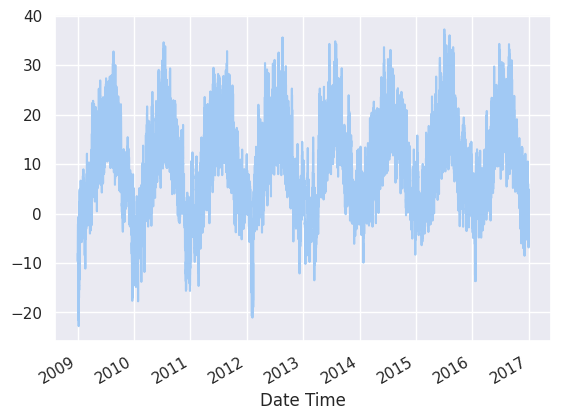

In [6]:
# Extract the 'T (degC)' column from the DataFrame and store it in the 'temp' variable
temp = df['T (degC)']

# Create a line plot of temperature data
temp.plot()


In [7]:
def df_to_X_y(df, window_size=5):
    """
    Convert a DataFrame into input-output pairs for a time series prediction task.

    Parameters:
    - df: pandas DataFrame
        The input DataFrame containing the time series data.
    - window_size: int (default: 5)
        The size of the sliding window used to create input sequences.

    Returns:
    - X: numpy.ndarray
        An array containing input sequences with shape (num_samples, window_size, num_features).
    - y: numpy.ndarray
        An array containing the corresponding target values with shape (num_samples,).
    """
    df_as_np = df.to_numpy()
    X = []
    y = []

    # Iterate through the DataFrame to create input-output pairs
    for i in range(len(df_as_np) - window_size):
        # Extract a window of data as input
        window_data = df_as_np[i:i + window_size]
        # Reshape the window data to have shape (window_size, num_features)
        window_data = [[a] for a in window_data]
        X.append(window_data)

        # Get the label for the next time step as output
        label = df_as_np[i + window_size]
        y.append(label)

    # Convert the lists to NumPy arrays
    return np.array(X), np.array(y)


In [8]:
# Define the window size
WINDOW_SIZE = 5

# Convert the DataFrame 'temp' into input-output pairs
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)

# Print the shapes of the resulting arrays
print("Shape of X1:", X1.shape)
print("Shape of y1:", y1.shape)


Shape of X1: (70086, 5, 1)
Shape of y1: (70086,)


In [9]:
# Split the data into training, validation, and testing sets

# Training set: The first 60,000 samples
X_train1, y_train1 = X1[:60000], y1[:60000]

# Validation set: Samples 60,000 to 64,999
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]

# Testing set: Samples from 65,000 onwards
X_test1, y_test1 = X1[65000:], y1[65000:]

# Print the shapes of the resulting sets
print("Training set shapes - X_train1:", X_train1.shape, "y_train1:", y_train1.shape)
print("Validation set shapes - X_val1:", X_val1.shape, "y_val1:", y_val1.shape)
print("Testing set shapes - X_test1:", X_test1.shape, "y_test1:", y_test1.shape)

Training set shapes - X_train1: (60000, 5, 1) y_train1: (60000,)
Validation set shapes - X_val1: (5000, 5, 1) y_val1: (5000,)
Testing set shapes - X_test1: (5086, 5, 1) y_test1: (5086,)


In [10]:
# Import necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# Create a Sequential model
model1 = Sequential()

# Add an input layer with input shape (5, 1)
model1.add(InputLayer((5, 1)))

# Add an LSTM layer with 64 units
model1.add(LSTM(64))

# Add a dense layer with 8 units and ReLU activation function
model1.add(Dense(8, activation='relu'))

# Add a dense layer with 1 unit for regression (linear activation function)
model1.add(Dense(1, activation='linear'))

# Print a summary of the model's architecture
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Define a ModelCheckpoint callback to save the best model during training
cp1 = ModelCheckpoint('model1/', save_best_only=True)

# Compile the model with Mean Squared Error as the loss function,
# Adam optimizer with a learning rate of 0.0001, and RMSE as a metric
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [12]:
# Fit the model using training data (X_train1, y_train1)
# and validate it with validation data (X_val1, y_val1)
# for 10 epochs, while using the ModelCheckpoint callback to save the best model
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1875/1875 [==============================] - 21s 9ms/step - loss: 58.9362 - root_mean_squared_error: 7.6770 - val_loss: 2.6011 - val_root_mean_squared_error: 1.6128
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 4.8878 - root_mean_squared_error: 2.2108 - val_loss: 0.6799 - val_root_mean_squared_error: 0.8245
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.3282 - root_mean_squared_error: 1.1525 - val_loss: 0.5415 - val_root_mean_squared_error: 0.7359
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8209 - root_mean_squared_error: 0.9061 - val_loss: 0.5058 - val_root_mean_squared_error: 0.7112
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7072 - root_mean_squared_error: 0.8410 - val_loss: 0.5063 - val_root_mean_squared_error: 0.7116
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6747 - root_mean_squared_error: 0.8214 - val_l

In [13]:
# Import the necessary module to load a saved model
from tensorflow.keras.models import load_model

# Load the previously saved model from the 'model1/' directory
model1 = load_model('model1/')

In [14]:
# Use the loaded model to make predictions on the training data (X_train1)
train_predictions = model1.predict(X_train1).flatten()

# Create a DataFrame to display the predicted values and actual values
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train1})

# Display the DataFrame
train_results

1875/1875 [==============================] - 4s 2ms/step


,Train Predictions,Actuals
0,-9.769417,-9.67
1,-9.576408,-9.17
2,-8.800672,-8.10
3,-7.279766,-7.66
4,-7.185782,-7.04
...,...,...
59995,6.252763,6.07
59996,7.395520,9.88
59997,12.234545,13.53
59998,15.884235,15.43


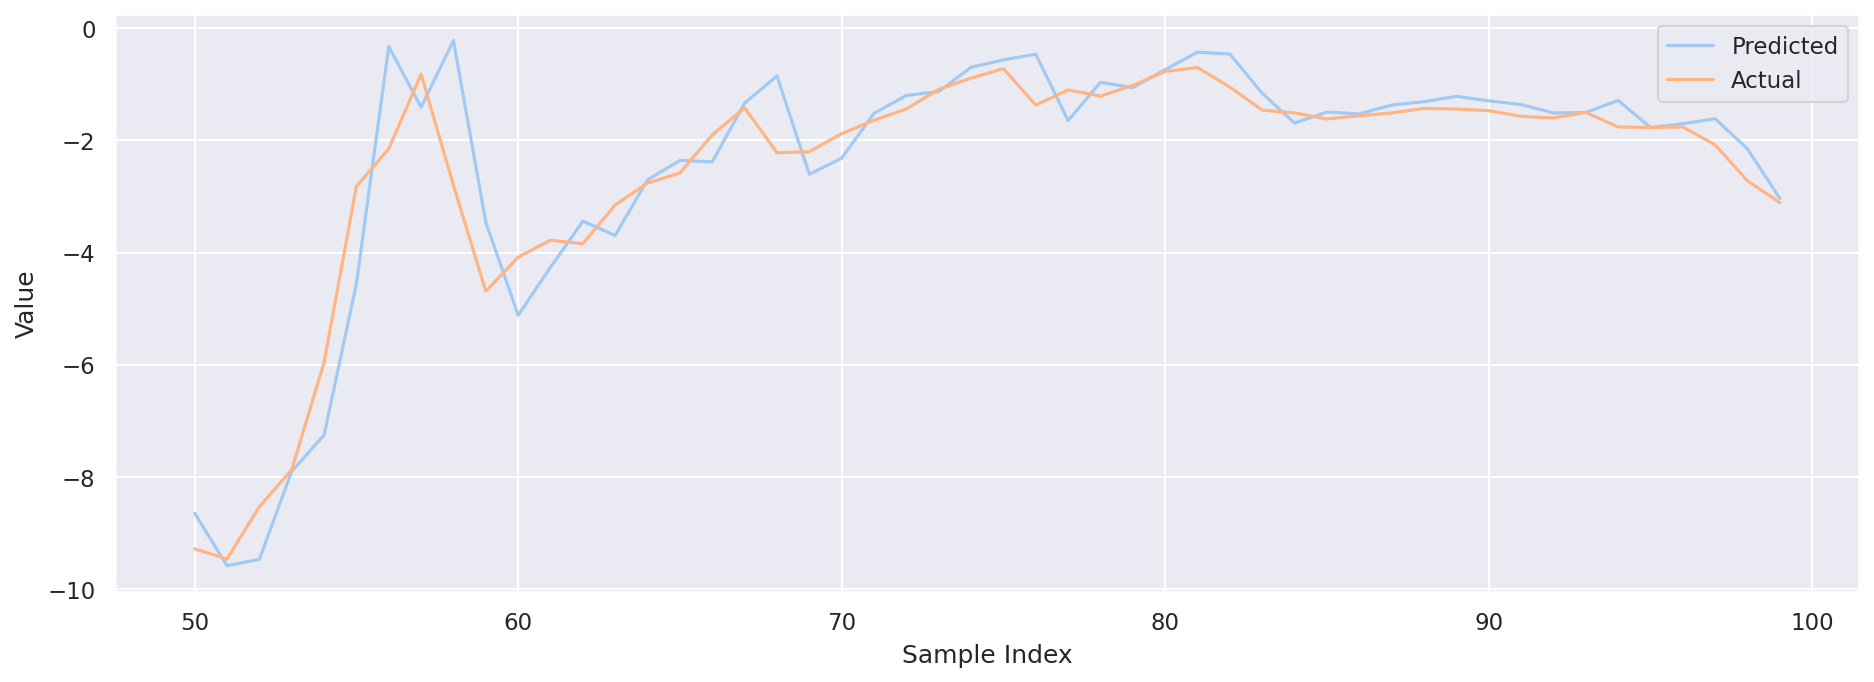

In [15]:
# Import the necessary module for plotting
import matplotlib.pyplot as plt

# Plot a portion of the predicted values and actual values (e.g., samples 50 to 99)
plt.figure(figsize = (15,5),dpi = 150)
plt.plot(train_results['Train Predictions'][50:100], label='Predicted')
plt.plot(train_results['Actuals'][50:100], label='Actual')

# Add labels and a legend to the plot
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

# Display the plot
plt.show()


In [16]:
# Use the loaded model to make predictions on the validation data (X_val1)
val_predictions = model1.predict(X_val1).flatten()

# Create a DataFrame to display the predicted values and actual values for the validation set
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals': y_val1})

# Display the DataFrame
val_results

157/157 [==============================] - 1s 2ms/step


,Val Predictions,Actuals
0,15.616136,14.02
1,13.200112,13.67
2,12.973374,12.27
3,11.442632,11.19
4,10.353765,10.85
...,...,...
4995,17.302778,18.27
4996,17.468676,17.85
4997,17.264521,16.65
4998,15.794018,15.85


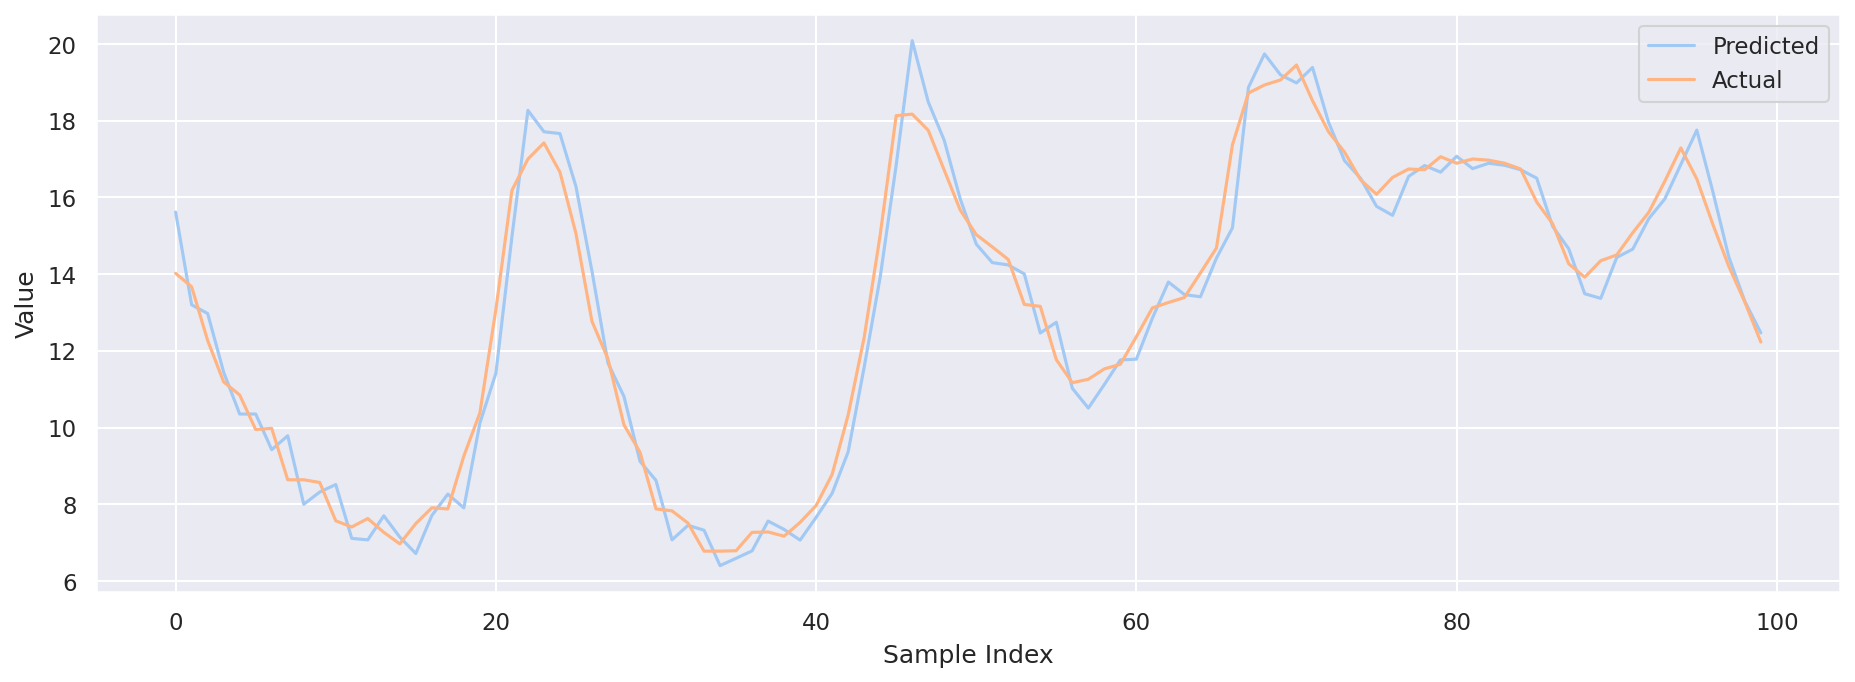

In [17]:
# Plot a portion of the predicted values and actual values (e.g., samples 0 to 99)
plt.figure(figsize = (15,5),dpi = 150)
plt.plot(val_results['Val Predictions'][:100], label='Predicted')
plt.plot(val_results['Actuals'][:100], label='Actual')

# Add labels and a legend to the plot
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

# Display the plot
plt.show()

In [18]:
# Use the loaded model to make predictions on the test data (X_test1)
test_predictions = model1.predict(X_test1).flatten()

# Create a DataFrame to display the predicted values and actual values for the test set
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals': y_test1})

# Display the DataFrame
test_results

159/159 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,14.351610,13.99
1,13.180608,13.46
2,12.818720,12.93
3,12.431414,12.43
4,11.978698,12.17
...,...,...
5081,-0.959978,-0.98
5082,-1.395072,-1.40
5083,-1.618518,-2.75
5084,-3.305205,-2.89


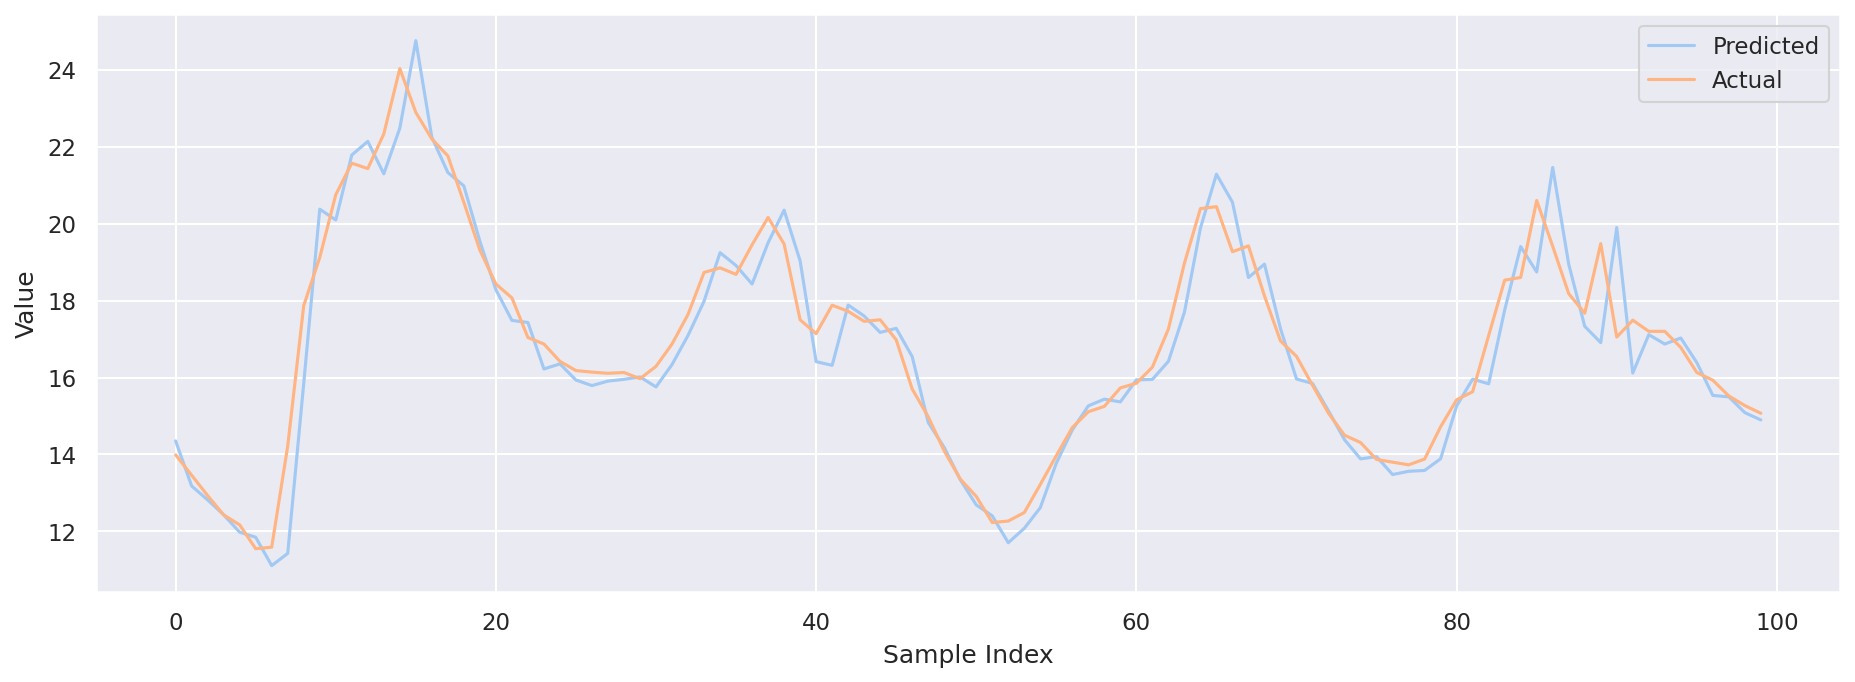

In [19]:
# Plot a portion of the predicted values and actual values (e.g., samples 0 to 99)
plt.figure(figsize = (15,5),dpi = 150)
plt.plot(test_results['Test Predictions'][:100], label='Predicted')
plt.plot(test_results['Actuals'][:100], label='Actual')

# Add labels and a legend to the plot
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

# Display the plot
plt.show()


In [20]:
# Import necessary modules
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
    """
    Plot predictions and actual values from a model and calculate mean squared error.

    Parameters:
    - model: a trained machine learning model
    - X: input data
    - y: target data (actual values)
    - start: starting index for plotting (default: 0)
    - end: ending index for plotting (default: 100)

    Returns:
    - df: a DataFrame containing 'Predictions' and 'Actuals' columns
    - mse_value: mean squared error between y and predictions
    """
    # Make predictions using the model
    predictions = model.predict(X).flatten()

    # Create a DataFrame to store the predicted values and actual values
    df = pd.DataFrame(data={'Predictions': predictions, 'Actuals': y})

    # Plot a subset of the predicted values and actual values
    plt.figure(figsize = (15,5),dpi = 150)
    plt.plot(df['Predictions'][start:end], label='Predicted')
    plt.plot(df['Actuals'][start:end], label='Actual')

    # Add labels and a legend to the plot
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()

    # Calculate the mean squared error
    mse_value = mse(y, predictions)

    # Return the DataFrame and the mean squared error
    return df, mse_value

159/159 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.6249627053902571
      Predictions  Actuals
0       14.351610    13.99
1       13.180608    13.46
2       12.818720    12.93
3       12.431414    12.43
4       11.978698    12.17
...           ...      ...
5081    -0.959978    -0.98
5082    -1.395072    -1.40
5083    -1.618518    -2.75
5084    -3.305205    -2.89
5085    -3.182814    -3.93

[5086 rows x 2 columns]


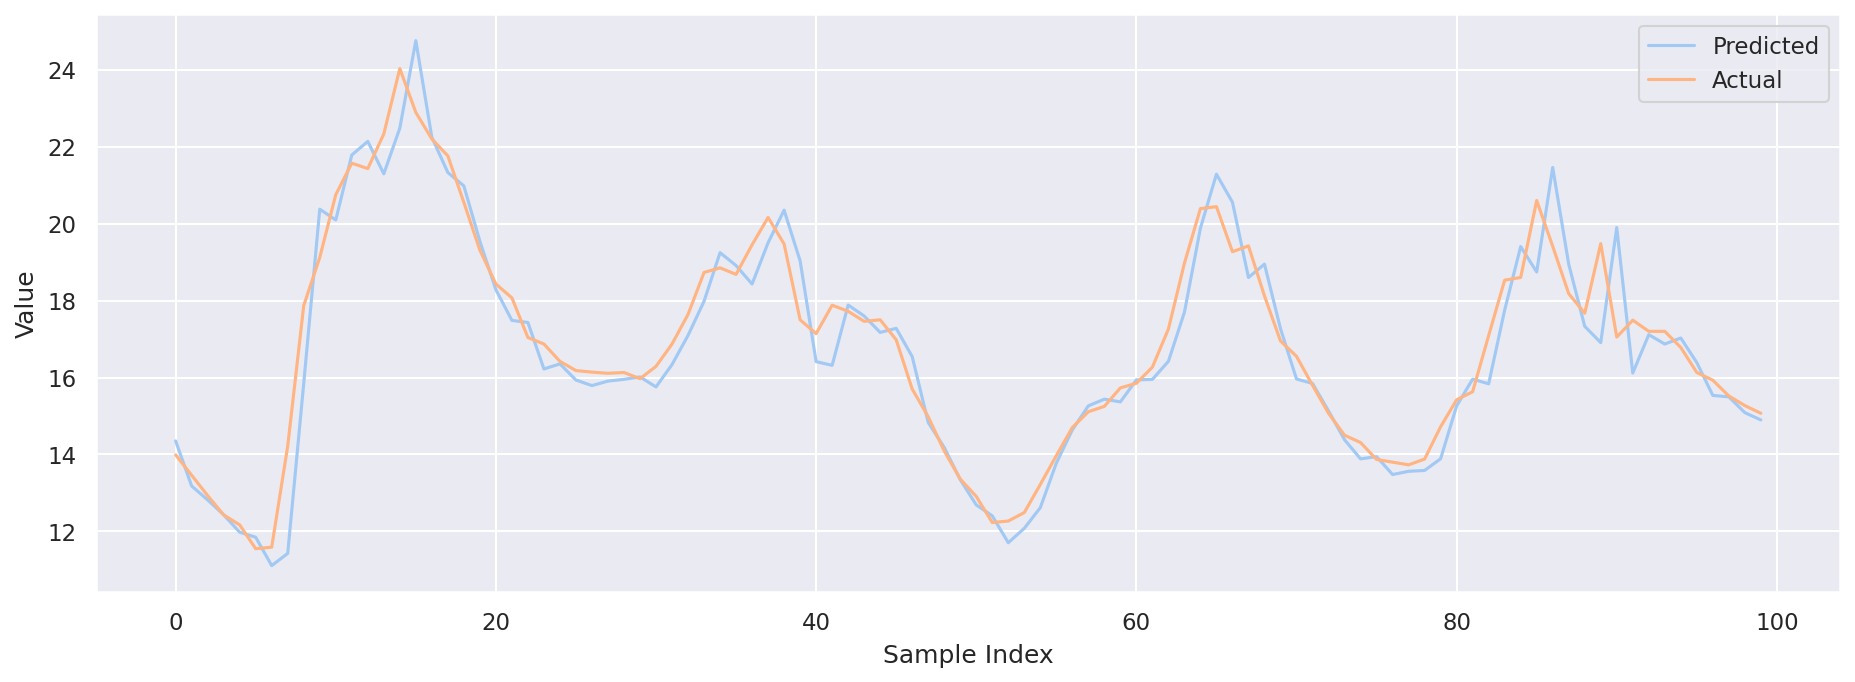

In [21]:
# Call the plot_predictions1 function with your model, test data, and actual values
results, mse_value = plot_predictions1(model1, X_test1, y_test1)

# Display the calculated mean squared error
print("Mean Squared Error (MSE):", mse_value)

# Optionally, you can display the DataFrame containing predictions and actual values
print(results)


In [22]:
# Create a new Sequential model
model2 = Sequential()

# Add an input layer with input shape (5, 1)
model2.add(InputLayer((5, 1)))

# Add a 1D convolutional layer with 64 filters and kernel size 2
model2.add(Conv1D(64, kernel_size=2))

# Flatten the output of the convolutional layer
model2.add(Flatten())

# Add a dense hidden layer with 8 units and ReLU activation function
model2.add(Dense(8, activation='relu'))

# Add a dense output layer with 1 unit for regression (linear activation function)
model2.add(Dense(1, activation='linear'))

# Print a summary of the model's architecture
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Define a ModelCheckpoint callback to save the best model during training
cp2 = ModelCheckpoint('model2/', save_best_only=True)

# Compile the model with Mean Squared Error as the loss function,
# Adam optimizer with a learning rate of 0.0001, and RMSE as a metric
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [24]:
# Fit the model using training data (X_train1, y_train1)
# and validate it with validation data (X_val1, y_val1)
# for 10 epochs, while using the ModelCheckpoint callback to save the best model
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 8.3253 - root_mean_squared_error: 2.8854 - val_loss: 1.1813 - val_root_mean_squared_error: 1.0869
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2190 - root_mean_squared_error: 1.1041 - val_loss: 0.7644 - val_root_mean_squared_error: 0.8743
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8819 - root_mean_squared_error: 0.9391 - val_loss: 0.5912 - val_root_mean_squared_error: 0.7689
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7469 - root_mean_squared_error: 0.8643 - val_loss: 0.5592 - val_root_mean_squared_error: 0.7478
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7033 - root_mean_squared_error: 0.8386 - val_loss: 0.5205 - val_root_mean_squared_error: 0.7215
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6849 - root_mean_squared_error: 0.8276 - val_loss: 0

In [25]:
# Create a new Sequential model
model3 = Sequential()

# Add an input layer with input shape (5, 1)
model3.add(InputLayer((5, 1)))

# Add a GRU (Gated Recurrent Unit) layer with 64 units
model3.add(GRU(64))

# Add a dense hidden layer with 8 units and ReLU activation function
model3.add(Dense(8, activation='relu'))

# Add a dense output layer with 1 unit for regression (linear activation function)
model3.add(Dense(1, activation='linear'))

# Print a summary of the model's architecture
model3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Define a ModelCheckpoint callback to save the best model during training
cp3 = ModelCheckpoint('model3/', save_best_only=True)

# Compile the model with Mean Squared Error as the loss function,
# Adam optimizer with a learning rate of 0.0001, and RMSE as a metric
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [27]:
# Train the model using the fit method.
# - X_train1: Training data input features
# - y_train1: Training data target labels
# - validation_data: Validation data used during training
# - epochs: Number of training epochs (iterations)
# - callbacks: List of callbacks to be applied during training, including cp3 (checkpoint)
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 23.1833 - root_mean_squared_error: 4.8149 - val_loss: 0.8320 - val_root_mean_squared_error: 0.9121
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2557 - root_mean_squared_error: 1.1206 - val_loss: 0.5638 - val_root_mean_squared_error: 0.7508
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7567 - root_mean_squared_error: 0.8699 - val_loss: 0.5145 - val_root_mean_squared_error: 0.7173
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6748 - root_mean_squared_error: 0.8215 - val_loss: 0.5066 - val_root_mean_squared_error: 0.7118
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6536 - root_mean_squared_error: 0.8085 - val_loss: 0.4988 - val_root_mean_squared_error: 0.7062
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.6470 - root_mean_squared_error: 0.8043 - val_

In [28]:
# Create a DataFrame 'temp_df' with a single column 'Temperature' containing temperature data.
temp_df = pd.DataFrame({'Temperature': temp})

# Add a new column 'Seconds' to 'temp_df' containing the timestamp in seconds for each index.
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)

# Display the resulting DataFrame 'temp_df'.
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [29]:
# Define constants for a day and a year in seconds
day = 60 * 60 * 24
year = 365.2425 * day

# Calculate sine and cosine of daily and yearly cycles based on timestamp 'Seconds' column.
temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))

# Display the first few rows of the modified DataFrame 'temp_df'.
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [30]:
# Remove the 'Seconds' column from the DataFrame 'temp_df'.
temp_df = temp_df.drop('Seconds', axis=1)

# Display the first few rows of the updated DataFrame 'temp_df'.
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [31]:
def df_to_X_y2(df, window_size=6):
    """
    Convert a DataFrame into input (X) and target (y) arrays for time series forecasting.

    Parameters:
    - df: DataFrame containing the time series data.
    - window_size: Number of consecutive rows to use as input features.

    Returns:
    - X: Input array with shape (n_samples, window_size, n_features).
    - y: Target array with shape (n_samples,).
    """
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i + window_size]]
        X.append(row)
        label = df_as_np[i + window_size][0]
        y.append(label)
    return np.array(X), np.array(y)


In [32]:
# Convert the 'temp_df' DataFrame into input (X2) and target (y2) arrays using the 'df_to_X_y2' function.
X2, y2 = df_to_X_y2(temp_df)

# Display the shapes of the resulting arrays.
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [33]:
# Split the X2 and y2 arrays into training, validation, and test sets.
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]

# Display the shapes of the resulting arrays.
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape


((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [34]:
# Calculate the mean and standard deviation of the first feature (temperature) in the training set.
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
    """
    Preprocess the input data by normalizing the temperature feature.

    Parameters:
    - X: Input data with shape (n_samples, window_size, n_features).

    Returns:
    - X: Preprocessed input data with the temperature feature normalized.
    """
    X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
    return X

In [35]:
# Preprocess the training, validation, and test data using the 'preprocess' function.
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)


array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [36]:
# Create a Sequential model 'model4'.
model4 = Sequential()

# Add an input layer with shape (6, 5).
model4.add(InputLayer((6, 5)))

# Add an LSTM layer with 64 units.
model4.add(LSTM(64))

# Add a Dense layer with 8 units and ReLU activation function.
model4.add(Dense(8, activation='relu'))

# Add a Dense output layer with 1 unit and linear activation function.
model4.add(Dense(1, activation='linear'))

# Display the summary of the model architecture.
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Create a ModelCheckpoint callback 'cp4' to save the best model during training.
cp4 = ModelCheckpoint('model4/', save_best_only=True)

# Compile the 'model4' with Mean Squared Error loss, Adam optimizer, and Root Mean Squared Error metric.
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [38]:
# Train 'model4' using the fit method.
# - X2_train: Training data input features
# - y2_train: Training data target labels
# - validation_data: Validation data used during training
# - epochs: Number of training epochs (iterations)
# - callbacks: List of callbacks to be applied during training, including cp4 (checkpoint)
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 39.5938 - root_mean_squared_error: 6.2924 - val_loss: 4.3337 - val_root_mean_squared_error: 2.0817
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 5.1878 - root_mean_squared_error: 2.2777 - val_loss: 1.7468 - val_root_mean_squared_error: 1.3217
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.8641 - root_mean_squared_error: 1.3653 - val_loss: 1.0013 - val_root_mean_squared_error: 1.0007
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1544 - root_mean_squared_error: 1.0744 - val_loss: 0.7687 - val_root_mean_squared_error: 0.8767
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8696 - root_mean_squared_error: 0.9325 - val_loss: 0.6047 - val_root_mean_squared_error: 0.7776
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6992 - root_mean_squared_error: 0.8362 - val_

159/159 [==============================] - 1s 2ms/step


(      Predictions  Actuals
 0       13.127849    13.46
 1       12.690828    12.93
 2       12.289541    12.43
 3       11.981422    12.17
 4       12.068809    11.55
 ...           ...      ...
 5080    -1.119378    -0.98
 5081    -1.474778    -1.40
 5082    -1.727412    -2.75
 5083    -3.043051    -2.89
 5084    -3.166379    -3.93
 
 [5085 rows x 2 columns],
 0.48491127196696276)

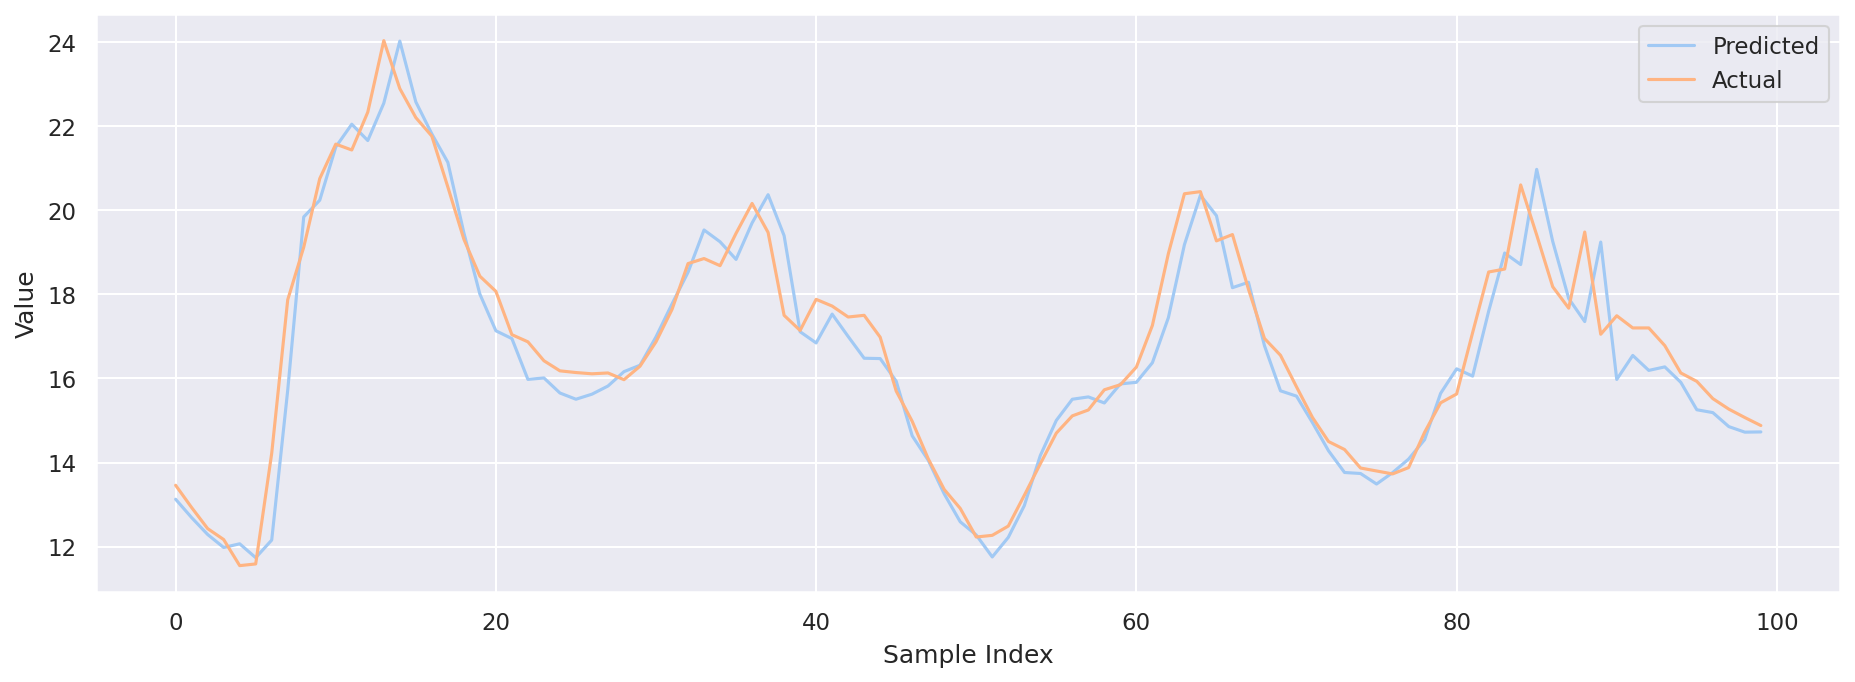

In [39]:
# Plot predictions using 'model4' on the test data.
# - model4: The trained model for making predictions.
# - X2_test: Test data input features.
# - y2_test: True target labels for the test data.
plot_predictions1(model4, X2_test, y2_test)

In [40]:
# Concatenate the 'p (mbar)' column from DataFrame 'df' with the 'temp_df' DataFrame.
# The result is stored in the 'p_temp_df' DataFrame.
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)

# Display the first few rows of the concatenated DataFrame 'p_temp_df'.
p_temp_df.head()


,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [41]:
def df_to_X_y3(df, window_size=7):
    """
    Convert a DataFrame into input (X) and target (y) arrays for time series forecasting.

    Parameters:
    - df: DataFrame containing the time series data.
    - window_size: Number of consecutive rows to use as input features.

    Returns:
    - X: Input array with shape (n_samples, window_size, n_features).
    - y: Target array with shape (n_samples, 2), containing two labels.
    """
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i + window_size]]
        X.append(row)
        label = [df_as_np[i + window_size][0], df_as_np[i + window_size][1]]
        y.append(label)
    return np.array(X), np.array(y)


In [42]:
# Convert the 'p_temp_df' DataFrame into input (X3) and target (y3) arrays using the 'df_to_X_y3' function.
X3, y3 = df_to_X_y3(p_temp_df)

# Display the shapes of the resulting arrays.
X3.shape, y3.shape


((70084, 7, 6), (70084, 2))

In [43]:
# Split the X3 and y3 arrays into training, validation, and test sets.
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]

# Display the shapes of the resulting arrays.
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [44]:
# Calculate the mean and standard deviation of the first feature (p (mbar)) in the training set.
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

# Calculate the mean and standard deviation of the second feature (Temperature) in the training set.
temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
    """
    Preprocess the input data by normalizing the 'p (mbar)' and 'Temperature' features.

    Parameters:
    - X: Input data with shape (n_samples, window_size, n_features).

    Returns:
    - X: Preprocessed input data with both features normalized.
    """
    X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
    X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
    """
    Preprocess the target data by normalizing the 'p (mbar)' and 'Temperature' labels.

    Parameters:
    - y: Target data with shape (n_samples, 2), containing two labels.

    Returns:
    - y: Preprocessed target data with both labels normalized.
    """
    y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
    y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
    return y

In [45]:
# Preprocess the training, validation, and test data using the 'preprocess3' function.
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [46]:
# Preprocess the training, validation, and test target data using the 'preprocess_output3' function.
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)


array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [47]:
# Create a Sequential model 'model5'.
model5 = Sequential()

# Add an input layer with shape (7, 6).
model5.add(InputLayer((7, 6)))

# Add an LSTM layer with 64 units.
model5.add(LSTM(64))

# Add a Dense layer with 8 units and ReLU activation function.
model5.add(Dense(8, activation='relu'))

# Add a Dense output layer with 2 units (for 'p (mbar)' and 'Temperature') and linear activation function.
model5.add(Dense(2, activation='linear'))

# Display the summary of the model architecture.
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# Create a ModelCheckpoint callback 'cp5' to save the best model during training.
cp5 = ModelCheckpoint('model5/', save_best_only=True)

# Compile the 'model5' with Mean Squared Error loss, Adam optimizer, and Root Mean Squared Error metric.
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [49]:
# Train 'model5' using the fit method.
# - X3_train: Training data input features
# - y3_train: Training data target labels
# - validation_data: Validation data used during training
# - epochs: Number of training epochs (iterations)
# - callbacks: List of callbacks to be applied during training, including cp5 (checkpoint)
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.1584 - root_mean_squared_error: 0.3980 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1857
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0252 - root_mean_squared_error: 0.1586 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1283
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0116 - root_mean_squared_error: 0.1078 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0884
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0077 - root_mean_squared_error: 0.0878 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0754
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0064 - root_mean_squared_error: 0.0799 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0704
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0057 - root_mean_squared_error: 0.0757 - val_l

In [50]:
def plot_predictions2(model, X, y, start=0, end=100):
    """
    Plot predictions made by the model against actual values for both Temperature and Pressure.

    Parameters:
    - model: The trained model for making predictions.
    - X: Input data with shape (n_samples, window_size, n_features).
    - y: True target data with shape (n_samples, 2), containing both 'Pressure' and 'Temperature' labels.
    - start: Index to start plotting from (default: 0).
    - end: Index to end plotting (default: 100).

    Returns:
    - df: DataFrame containing the plotted data within the specified range.
    """
    predictions = model.predict(X)
    p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
    p_actuals, temp_actuals = y[:, 0], y[:, 1]
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                            'Temperature Actuals': temp_actuals,
                            'Pressure Predictions': p_preds,
                            'Pressure Actuals': p_actuals
                            })
    plt.plot(df['Temperature Predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.plot(df['Pressure Predictions'][start:end])
    plt.plot(df['Pressure Actuals'][start:end])
    return df[start:end]


159/159 [==============================] - 1s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.418477,0.412451,-0.785525,-0.793439
1,0.373389,0.353683,-0.772130,-0.763123
2,0.327246,0.323123,-0.736533,-0.721893
3,0.312252,0.250251,-0.677477,-0.652773
4,0.266128,0.254952,-0.596268,-0.652773
...,...,...,...,...
95,0.705064,0.716869,-0.416005,-0.416310
96,0.667382,0.687485,-0.416185,-0.399333
97,0.649598,0.663978,-0.397141,-0.399333
98,0.644292,0.641646,-0.381190,-0.400546


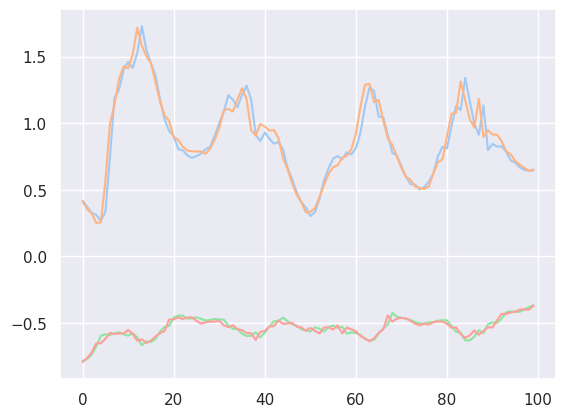

In [51]:
# Plot predictions using 'model5' on the test data and compare them with actual values.
# The function returns a DataFrame with plotted data.
plot_predictions2(model5, X3_test, y3_test)

In [52]:
def postprocess_temp(arr):
    """
    Postprocess an array by reversing the normalization for the 'Temperature' feature.

    Parameters:
    - arr: Array containing 'Temperature' values.

    Returns:
    - arr: Postprocessed array with original 'Temperature' values.
    """
    arr = (arr * temp_training_std3) + temp_training_mean3
    return arr

def postprocess_p(arr):
    """
    Postprocess an array by reversing the normalization for the 'p (mbar)' feature.

    Parameters:
    - arr: Array containing 'p (mbar)' values.

    Returns:
    - arr: Postprocessed array with original 'p (mbar)' values.
    """
    arr = (arr * p_training_std3) + p_training_mean3
    return arr

In [53]:
def plot_predictions2(model, X, y, start=0, end=100):
    """
    Plot postprocessed predictions made by the model against postprocessed actual values for both Temperature and Pressure.

    Parameters:
    - model: The trained model for making predictions.
    - X: Input data with shape (n_samples, window_size, n_features).
    - y: True target data with shape (n_samples, 2), containing both 'Pressure' and 'Temperature' labels.
    - start: Index to start plotting from (default: 0).
    - end: Index to end plotting (default: 100).

    Returns:
    - df: DataFrame containing the plotted data within the specified range.
    """
    predictions = model.predict(X)
    p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
    p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                            'Temperature Actuals': temp_actuals,
                            'Pressure Predictions': p_preds,
                            'Pressure Actuals': p_actuals
                            })
    plt.plot(df['Temperature Predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.plot(df['Pressure Predictions'][start:end])
    plt.plot(df['Pressure Actuals'][start:end])
    return df[start:end]


159/159 [==============================] - 0s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.981276,12.93,982.495300,982.43
1,12.597664,12.43,982.605774,982.68
2,12.205078,12.17,982.899292,983.02
3,12.077507,11.55,983.386292,983.59
4,11.685085,11.59,984.056030,983.59
...,...,...,...,...
95,15.419559,15.52,985.542542,985.54
96,15.098961,15.27,985.541077,985.68
97,14.947655,15.07,985.698120,985.68
98,14.902512,14.88,985.829651,985.67


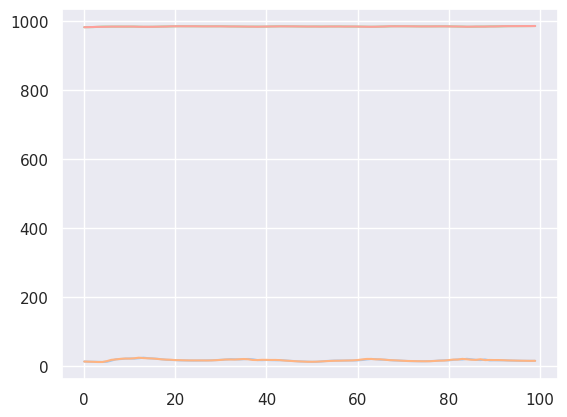

In [54]:
# Plot predictions using 'model5' on the test data, postprocess them, and compare with postprocessed actual values.
# The function returns a DataFrame with plotted and postprocessed data.
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df


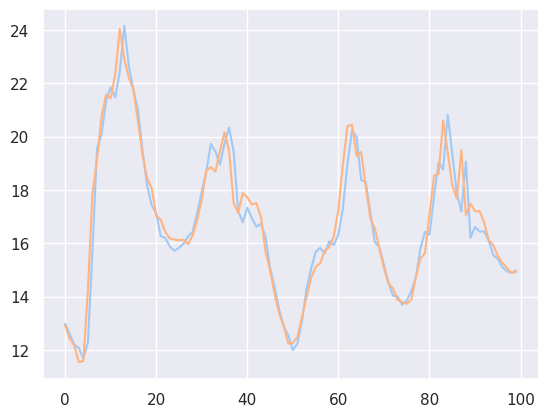

In [55]:
# Plot postprocessed 'Temperature Predictions' and 'Temperature Actuals' from the DataFrame within the specified range.
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])


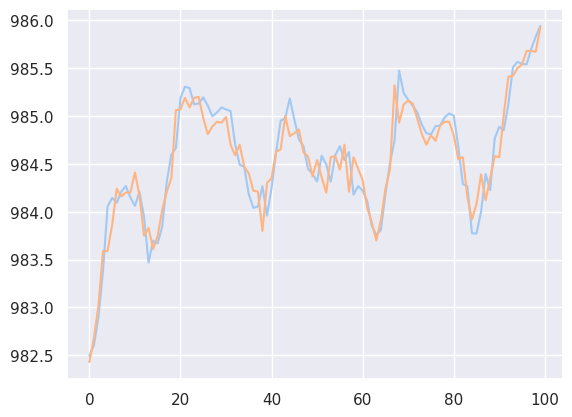

In [56]:
# Plot postprocessed 'Pressure Predictions' and 'Pressure Actuals' from the DataFrame within the specified range.
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [57]:
# Create a Sequential model 'model6'.
model6 = Sequential()

# Add an input layer with shape (7, 6).
model6.add(InputLayer((7, 6)))

# Add an LSTM layer with 32 units and return sequences.
model6.add(LSTM(32, return_sequences=True))

# Add another LSTM layer with 64 units.
model6.add(LSTM(64))

# Add a Dense layer with 8 units and ReLU activation function.
model6.add(Dense(8, activation='relu'))

# Add a Dense output layer with 2 units (for 'p (mbar)' and 'Temperature') and linear activation function.
model6.add(Dense(2, activation='linear'))

# Display the summary of the model architecture.
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_4 (LSTM)               (None, 64)                24832     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30362 (118.60 KB)
Trainable params: 30362 (118.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# Create a ModelCheckpoint callback 'cp6' to save the best model during training.
cp6 = ModelCheckpoint('model6/', save_best_only=True)

# Compile the 'model6' with Mean Squared Error loss, Adam optimizer, and Root Mean Squared Error metric.
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [59]:
# Train 'model6' using the fit method.
# - X3_train: Training data input features
# - y3_train: Training data target labels
# - validation_data: Validation data used during training
# - epochs: Number of training epochs (iterations)
# - callbacks: List of callbacks to be applied during training, including cp6 (checkpoint)
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1875/1875 [==============================] - 21s 9ms/step - loss: 0.1364 - root_mean_squared_error: 0.3693 - val_loss: 0.0469 - val_root_mean_squared_error: 0.2166
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0398 - root_mean_squared_error: 0.1996 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1893
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0273 - root_mean_squared_error: 0.1654 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1389
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0147 - root_mean_squared_error: 0.1214 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1029
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0097 - root_mean_squared_error: 0.0982 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0864
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0077 - root_mean_squared_error: 0.0876 - val_l

In [60]:
# Create a Sequential model 'model7'.
model7 = Sequential()

# Add an input layer with shape (7, 6).
model7.add(InputLayer((7, 6)))

# Add a 1D convolutional layer with 64 filters and a kernel size of 2, using ReLU activation.
model7.add(Conv1D(64, kernel_size=2, activation='relu'))

# Flatten the output from the convolutional layer.
model7.add(Flatten())

# Add a Dense layer with 8 units and ReLU activation function.
model7.add(Dense(8, activation='relu'))

# Add a Dense output layer with 2 units (for 'p (mbar)' and 'Temperature') and linear activation function.
model7.add(Dense(2, activation='linear'))

# Display the summary of the model architecture.
model7.summary()

# Create a ModelCheckpoint callback 'cp7' to save the best model during training.
cp7 = ModelCheckpoint('model6/', save_best_only=True)

# Compile the 'model7' with Mean Squared Error loss, Adam optimizer, and Root Mean Squared Error metric.
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_12 (Dense)            (None, 8)                 3080      
                                                                 
 dense_13 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3930 (15.35 KB)
Trainable params: 3930 (15.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
# Train 'model7' using the fit method.
# - X3_train: Training data input features
# - y3_train: Training data target labels
# - validation_data: Validation data used during training
# - epochs: Number of training epochs (iterations)
# - callbacks: List of callbacks to be applied during training, including cp7 (checkpoint)
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1639 - root_mean_squared_error: 0.4048 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1522
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0160 - root_mean_squared_error: 0.1266 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1070
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0100 - root_mean_squared_error: 0.1001 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0899
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0081 - root_mean_squared_error: 0.0900 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0821
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0072 - root_mean_squared_error: 0.0849 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0778
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0067 - root_mean_squared_error: 0.0819 - val_loss: 0